In [37]:
import numpy as np

## 1. Preperation

1.1 An activation function relates incoming signal to outgoing signal. It determines if and how strong a neuron responses to input.
1.2 The advantage lies in it being differentiable and thus allowing us to use backpropagation.
1.3 The formula is above. the graph looks like a stretched out S
1.4 The derivative is: sigmoid(x) * (1 - sigmoid(x)) or (e^x)/(1+e^-x)^2 


In [38]:
def sigmoid(x):
    if(not (isinstance(x, float) or isinstance(x, int))):
        return
    return 1/(1+np.exp(-x))

def sigmoidprime(x):
    return sigmoid(x) * (1 - sigmoid(x)) 

#use to calculate sigmoidprime if x = sigmoid(y)
def sigmoidprime_of_activation(x):
    return x *(1 - x)

## 2. Data Set

In [39]:
inputArr = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])

andLabel = np.array([0,0,0,1])
orLabel = np.array([0,1,1,1])
notandLabel = np.array([1,1,1,0])
notorLabel = np.array([1,0,0,0])
xorLabel = np.array([0,1,1,0])
allLabels = [andLabel, orLabel, notandLabel, notorLabel, xorLabel]

## 3. Perceptron

In [40]:
class Perceptron:
    def __init__(self,input_units):
        self.alpha = 1
        self.weights = np.random.rand(input_units)
        self.bias = np.random.randn()
        self.drive = 0
        if(isinstance(input_units, int)):
            self.input_units = input_units
        else:
            raise Exception("input_units takes only integers as an argument")
            
    def forward_step(self, inputs):
        self.inputs = np.array(inputs)
        self.drive = self.weights @ self.inputs + self.bias
        return sigmoid(self.drive)
        
    def update(self, inputs, delta):
        self.weights = self.weights - inputs * self.alpha * delta
        self.bais = self.bias - self.alpha * delta

## 4.&5. Multi-Layer Perceptron / Training

In [41]:
class Layer:
    def __init__(self,number_of_perceptrons, number_of_inputunits):
        self.layercontent = [Perceptron(number_of_inputunits) for _ in range(number_of_perceptrons)]
        
    def forward_step(self, inputs):
        output = np.array([perceptron.forward_step(inputs) for perceptron in self.layercontent])
        return output
    
    def update_layer(self,  inputs, deltaArr):
        for delta,perceptron in zip(deltaArr, self.layercontent):
            perceptron.update(inputs, delta)
    
    def get_layerweights(self):
        return np.array([perceptron.weights for perceptron in self.layercontent])

In [42]:
class MLP:
    
    def __init__(self, Layers = [Layer(4,2),Layer(1,4)]):
        self.layers = Layers
        self.layer_activations = []
        self.steps = []
        self.accuracies = []
        self.MSE = []
        
    def forward_step(self, input):
        for layer in self.layers:
            input = layer.forward_step(input)
        return input
        
    def backprop_step(self, input, target_value):
        self.layer_activations = [input]
        for layer in self.layers:
            input= layer.forward_step(input)
            self.layer_activations.append(input)
        self.layer_activations.reverse()
        delta = -(target_value - self.layer_activations[0])    
        for i in range(len(self.layers)):
            reversedLayers = self.layers[::-1]
            deltaArr = sigmoidprime_of_activation(self.layer_activations[i]) * delta
            reversedLayers[i].update_layer(self.layer_activations[i+1],deltaArr)
            delta = (np.dot(reversedLayers[i].get_layerweights().T, deltaArr))      
                
    def training_step(self, Labels):
        self.steps =[]
        self.accuracies =[]
        self.MSE =[]
        j = 0
        for label in Labels:
            for i in range(1000):
                j +=1
                self.steps.append(j)
                index = np.random.randint(len(inputArr))
                sample = inputArr[index]
                target = label[index]

                mlp.backprop_step(sample, target)

                accuracy_sum = 0
                loss_sum = 0
                for k in range(len(inputArr)):
                    output = mlp.forward_step(inputArr[k])  
                    accuracy_sum += int((output>0.5) == label[k]) 
                    loss_sum += (label[k]-output)**2
                accuracy = accuracy_sum / len(inputArr)             
                self.accuracies.append(accuracy)
                loss = loss_sum / len(inputArr)
                self.MSE.append(loss)


## 6. Visualization

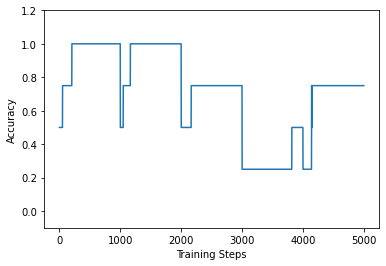

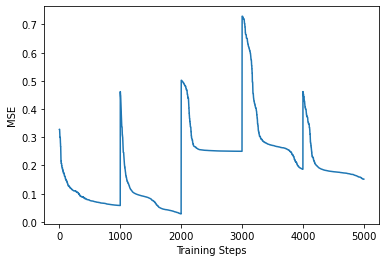

In [44]:
mlp = MLP()
mlp.training_step(allLabels)
steps = np.reshape(mlp.steps, (5000,))
accuracies = mlp.accuracies
MSE = np.reshape(mlp.MSE,(5000,))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.figure()
plt.plot(steps, MSE)
plt.xlabel("Training Steps")
plt.ylabel("MSE")

plt.show()